#Import Dependencies

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.layers import LeakyReLU

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.layers import Conv2DTranspose

In [ ]:
from tensorflow.keras.layers import Reshape

In [ ]:
from tensorflow.keras.models import load_model

#Visualizing the Data

In [ ]:
(train_X, train_y), (test_X, test_y) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Training dataset shape - Features : {}, Labels : {}'.format(train_X.shape, train_y.shape))
print('Testing dataset shape - Features : {}, Labels : {}'.format(test_X.shape, test_y.shape))

Training dataset shape - Features : (60000, 28, 28), Labels : (60000,)
Testing dataset shape - Features : (10000, 28, 28), Labels : (10000,)


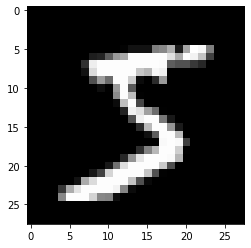

In [ ]:
plt.imshow(train_X[0], cmap='gray')

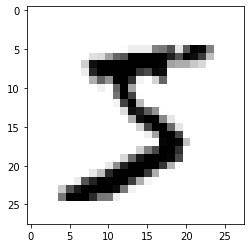

In [ ]:
#Image with inverted colours for easier review
plt.imshow(train_X[0], cmap='gray_r')

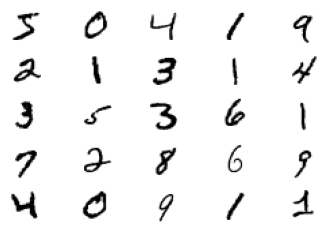

In [ ]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(train_X[i], cmap='gray_r')
plt.show()

#Discriminator Model

In [ ]:
#Define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(rate=0.4))
  model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(rate=0.4))
  model.add(Flatten())
  model.add(Dense(units=1, activation='sigmoid'))

  #compile model
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

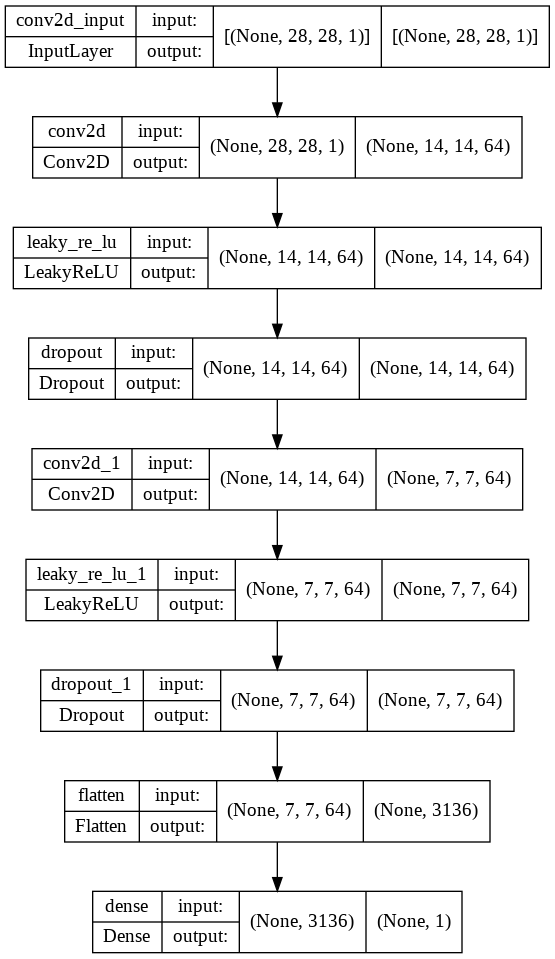

In [ ]:
#Define model
model = define_discriminator()

#Summarize the model
model.summary()

#Plot the model
plot_model(model=model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Load and prepare MNIST training images
def load_real_samples(trainX=train_X):
  #Expand to 3D, add channels dimension
  X = np.expand_dims(trainX, axis=-1)
  #Convert from unsigned int to float
  X = X.astype('float32')
  #scale from [0,255] to [0,1]
  X = X/255.0
  return X

In [ ]:
#Select real samples
def generate_real_samples(dataset, n_samples):
  #Choose random instances
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  #Retrieve selected images
  X = dataset[ix]
  #Generate 'real' class labels (1)
  y = np.ones((n_samples,1))
  return X, y

In [ ]:
#Generate n fake samples with class labels
def generate_fake_samples(n_samples):
  #Generate uniform random numbers in [0,1]
  X = np.random.rand(28*28*n_samples)
  #Reshape into a batch of grayscale images
  X = X.reshape((n_samples,28,28,1))
  #Generate 'fake' class labels (0)
  y = np.zeros((n_samples,1))
  return X, y

In [ ]:
#Train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
  half_batch = int(n_batch/2)
  #Manually enumerate epochs
  for i in range(n_iter):
    #Get randomly selected 'real' samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    #Update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    #Generate 'fake' examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    #Update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    #Summarize performance
    print('>Epoch %d real_accuracy=%.0f%% fake_accuracy=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:
#Load image data
dataset = load_real_samples()

#Fit the model
train_discriminator(model, dataset)

>Epoch 1 real_accuracy=62% fake_accuracy=5%
>Epoch 2 real_accuracy=72% fake_accuracy=8%
>Epoch 3 real_accuracy=73% fake_accuracy=23%
>Epoch 4 real_accuracy=77% fake_accuracy=38%
>Epoch 5 real_accuracy=65% fake_accuracy=63%
>Epoch 6 real_accuracy=80% fake_accuracy=73%
>Epoch 7 real_accuracy=75% fake_accuracy=90%
>Epoch 8 real_accuracy=68% fake_accuracy=96%
>Epoch 9 real_accuracy=73% fake_accuracy=98%
>Epoch 10 real_accuracy=73% fake_accuracy=100%
>Epoch 11 real_accuracy=76% fake_accuracy=100%
>Epoch 12 real_accuracy=70% fake_accuracy=100%
>Epoch 13 real_accuracy=74% fake_accuracy=100%
>Epoch 14 real_accuracy=71% fake_accuracy=100%
>Epoch 15 real_accuracy=74% fake_accuracy=100%
>Epoch 16 real_accuracy=77% fake_accuracy=100%
>Epoch 17 real_accuracy=76% fake_accuracy=100%
>Epoch 18 real_accuracy=78% fake_accuracy=100%
>Epoch 19 real_accuracy=79% fake_accuracy=100%
>Epoch 20 real_accuracy=80% fake_accuracy=100%
>Epoch 21 real_accuracy=87% fake_accuracy=100%
>Epoch 22 real_accuracy=87% fake_

#Generator Model

In [ ]:
#Define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  #Foundation for 7x7 image
  n_nodes = 128*7*7
  model.add(Dense(units=n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7,7,128)))
  #Upsample to 14x14
  model.add(Conv2DTranspose(filters=128, kernel_size=(4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #Upsample to 28x28
  model.add(Conv2DTranspose(filters=128, kernel_size=(4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(filters=1, kernel_size=(7,7), activation='sigmoid', padding='same'))
  return model

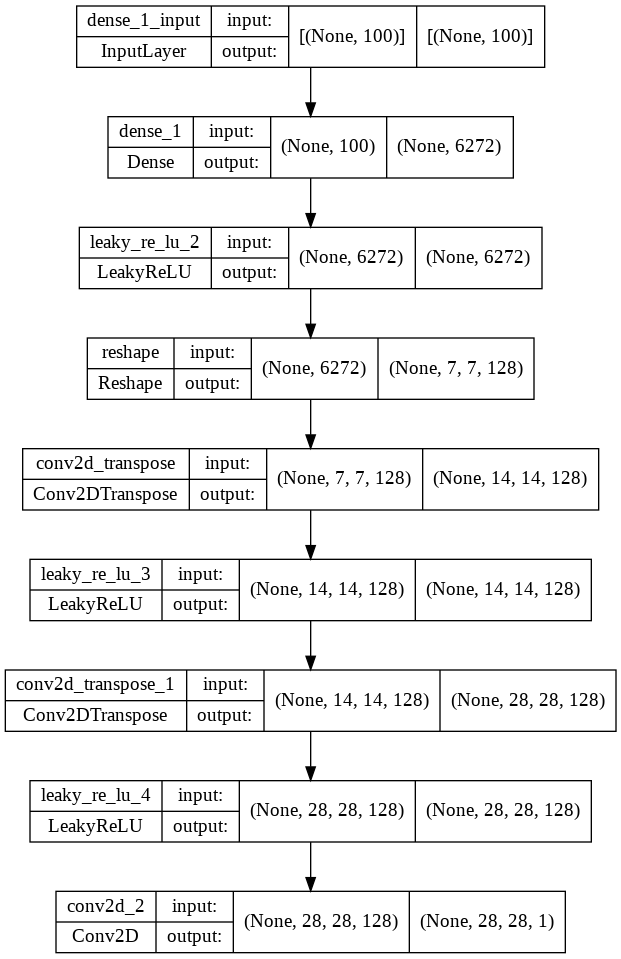

In [ ]:
#Define the size of latent space
latent_dim = 100

#Define the generator model
model = define_generator(latent_dim)

#Summarize the model
model.summary

#Plot the model
plot_model(model=model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  #Generate points in the latent space
  X_input = np.random.randn(latent_dim*n_samples)
  #Reshape into a batch of inputs for the network
  X_input = X_input.reshape(n_samples, latent_dim)
  return X_input

In [ ]:
#Use the generator to generate n fake examples with class labels
def generate_fake_samples(model, latent_dim, n_samples):
  #Generate points in latent space
  X_input = generate_latent_points(latent_dim, n_samples)
  #Predict output
  X = model.predict(X_input)
  #Create 'fake' class labels (0)
  y = np.zeros((n_samples,1))
  return X, y

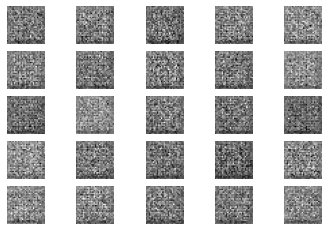

In [ ]:
#Generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)

#Plot the generated samples
for i in range(n_samples):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(X[i,:,:,0], cmap='gray_r')
plt.show()

#Combined GAN

In [ ]:
#Define the combined generator and discriminator model for updating the generator
def define_gan(g_model, d_model):
  #Make weights in the discriminator not trainable
  d_model.trainable = False
  #Connect the models
  model = Sequential()
  #Add the generator
  model.add(g_model)
  #Add the discriminator
  model.add(d_model)
  #Compile the model
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 28, 28, 1)         1164289   
                                                                 
 sequential_2 (Sequential)   (None, 1)                 40705     
                                                                 
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


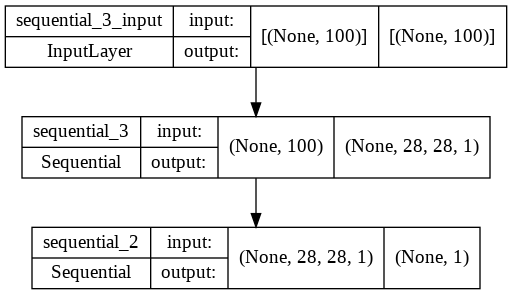

In [ ]:
#Size of latent space
latent_dim = 100
#Create the discriminator
d_model = define_discriminator()
#Create the generator
g_model = define_generator(latent_dim)
#Create the gan
gan_model = define_gan(g_model, d_model)
#Summarize gan model
gan_model.summary()
#Plot the gan model
plot_model(model=gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Train the composite model
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
  #Manually enumerate epochs
  for i in range(n_epochs):
    #Prepare points in latent space as input for the generator
    X_gan = generate_latent_points(latent_dim, n_batch)
    #Create inverted labels for the fake samples
    y_gan = np.ones((n_batch,1))
    #Update the generator via the discriminator's error
    gan_model.train_on_batch(X_gan, y_gan)

In [ ]:
#Create and save a plot of generated images
def save_plot(examples, epoch, n=10):
  #Plot images
  for i in range(n*n):
    #Define subplot
    plt.subplot(n,n,i+1)
    #Turn off axis
    plt.axis('off')
    #Plot raw pixel data
    plt.imshow(examples[i, :, :, 0], cmap='gray_r')
  #Save plot to file
  filename = 'generate_plot_e%03d.png' % (epoch+1)
  plt.savefig(filename)
  plt.close()

In [ ]:
#Evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
  #Prepare real samples
  X_real, y_real = generate_real_samples(dataset, n_samples)
  #Evaluate discriminator on real samples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  #Prepare fake examples
  X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  #Evaluate discriminator on fake samples
  _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose=0)
  #Summarise discriminator performance
  print('> Accuracy - Real: %.0f%%, Fake: %.0f%%' % (acc_real*100, acc_fake*100))
  #Save plot
  save_plot(X_fake, epoch)
  #Save the generator model tile file
  filename = 'generator_model_%03d.h5' % (epoch+1)
  g_model.save(filename)

In [ ]:
#Train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
  batches_per_epoch = int(dataset.shape[0]/n_batch)
  #Manually enumerate epochs
  for i in range(n_epochs):
    #Enumerate batches over the training set
    for j in range(batches_per_epoch):
      #Get randomly selected 'real' samples
      X_real, y_real = generate_real_samples(dataset, n_batch)
      #Generate 'fake' examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_batch)
      #Create training set for the discriminator
      X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
      #Update discriminator model weights
      d_loss, _ = d_model.train_on_batch(X, y)
      #Prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      #Create inverted labels for the fake samples
      y_gan = np.ones((n_batch,1))
      #Update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      #Summarize the loss on this batch
      print('> Epoch: %d, batch: %d/%d, Discriminator_loss = %.3f, Generator loss = %.3f' % (i+1, j+1, batches_per_epoch, d_loss, g_loss))
    #Evaluate the model performance
    if (i+1)%10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
#Size of latent space
latent_dim = 100
#Create the discriminator
d_model = define_discriminator()
#Create the generator
g_model = define_generator(latent_dim)
#Create the gan
gan_model = define_gan(g_model, d_model)
#Load image data
dataset = load_real_samples()
#Train model
train(g_model, d_model, gan_model, dataset, latent_dim)

> Epoch: 72, batch: 162/234, Discriminator_loss = 0.696, Generator loss = 0.695
> Epoch: 72, batch: 163/234, Discriminator_loss = 0.686, Generator loss = 0.689
> Epoch: 72, batch: 164/234, Discriminator_loss = 0.685, Generator loss = 0.683
> Epoch: 72, batch: 165/234, Discriminator_loss = 0.693, Generator loss = 0.723
> Epoch: 72, batch: 166/234, Discriminator_loss = 0.687, Generator loss = 0.737
> Epoch: 72, batch: 167/234, Discriminator_loss = 0.688, Generator loss = 0.726
> Epoch: 72, batch: 168/234, Discriminator_loss = 0.687, Generator loss = 0.702
> Epoch: 72, batch: 169/234, Discriminator_loss = 0.692, Generator loss = 0.706
> Epoch: 72, batch: 170/234, Discriminator_loss = 0.690, Generator loss = 0.709
> Epoch: 72, batch: 171/234, Discriminator_loss = 0.687, Generator loss = 0.724
> Epoch: 72, batch: 172/234, Discriminator_loss = 0.693, Generator loss = 0.706
> Epoch: 72, batch: 173/234, Discriminator_loss = 0.687, Generator loss = 0.699
> Epoch: 72, batch: 174/234, Discriminat

KeyboardInterrupt: ignored

#Using trained GAN to generate images

In [ ]:
#Load model
model = load_model('generator_model_100.h5')
#All 0s
vector = np.asarray([[0.0 for _ in range(100)]])
#Generate image
X = model.predict(vector)
#Plot the result
plt.imshow(X[0, :, :, 0], cmap='gray_r')
plt.show()